# Background
The objective of this project is to classify the overall sentiment of a tweet's context as neutral, negative, or positive using NLP classifiers. To complete, this project, we are given a dataset of 27,481 tweets, where 22,464 of those tweets were captured as having either a neutral, negative, or positive sentiment. Our goal is to use this training data of ~27.5k tweets to predict the sentiment of the 3,534 tweets in our testing data set.

### Importing Packages

In [54]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import nltk
from nltk.tokenize import RegexpTokenizer
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn import datasets

### Reading Dataset

In [4]:
train = pd.read_csv("C:/Users/valmh/Documents/GitHub/ENTITY-Final-Project/Data/train.csv")
train.head()

,textID,text,selected_text,sentiment
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative
2,088c60f138,my boss is bullying me...,bullying me,negative
3,9642c003ef,what interview! leave me alone,leave me alone,negative
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative


## Data Wrangling

### Dropping ID column

In [5]:
train = train[['text','selected_text', 'sentiment']]

In [6]:
train.head()

,text,selected_text,sentiment
0,"I`d have responded, if I were going","I`d have responded, if I were going",neutral
1,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative
2,my boss is bullying me...,bullying me,negative
3,what interview! leave me alone,leave me alone,negative
4,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative


### Tokenizing the Data & Remove Capitalization

In [7]:
train['text'] = train.text.astype(str).str.lower()
tokenizer = RegexpTokenizer('\w+')
train['tokens'] = train['text'].apply(tokenizer.tokenize)
train.head()

,text,selected_text,sentiment,tokens
0,"i`d have responded, if i were going","I`d have responded, if I were going",neutral,"[i, d, have, responded, if, i, were, going]"
1,sooo sad i will miss you here in san diego!!!,Sooo SAD,negative,"[sooo, sad, i, will, miss, you, here, in, san,..."
2,my boss is bullying me...,bullying me,negative,"[my, boss, is, bullying, me]"
3,what interview! leave me alone,leave me alone,negative,"[what, interview, leave, me, alone]"
4,"sons of ****, why couldn`t they put them on t...","Sons of ****,",negative,"[sons, of, why, couldn, t, they, put, them, on..."


### Removing Stopwords from Tokens List

In [8]:
stopwords = nltk.corpus.stopwords.words('english')

In [9]:
train['sample']=train.tokens.isin(stopwords).any()

In [10]:
train.head()

,text,selected_text,sentiment,tokens,sample
0,"i`d have responded, if i were going","I`d have responded, if I were going",neutral,"[i, d, have, responded, if, i, were, going]",False
1,sooo sad i will miss you here in san diego!!!,Sooo SAD,negative,"[sooo, sad, i, will, miss, you, here, in, san,...",False
2,my boss is bullying me...,bullying me,negative,"[my, boss, is, bullying, me]",False
3,what interview! leave me alone,leave me alone,negative,"[what, interview, leave, me, alone]",False
4,"sons of ****, why couldn`t they put them on t...","Sons of ****,",negative,"[sons, of, why, couldn, t, they, put, them, on...",False


## Sentiment DataFrames

Here, we will break the larger dataframe into smaller dataframes of neutral, negative, and positive sentiments. We will also produce word clouds to see which words influence sentiment classification.

### Neutral Sentiment

In [11]:
neutral_tokens = []
neutral = train[train['sentiment']=='neutral']

In [12]:
neutral.head()

,text,selected_text,sentiment,tokens,sample
0,"i`d have responded, if i were going","I`d have responded, if I were going",neutral,"[i, d, have, responded, if, i, were, going]",False
5,http://www.dothebouncy.com/smf - some shameles...,http://www.dothebouncy.com/smf - some shameles...,neutral,"[http, www, dothebouncy, com, smf, some, shame...",False
7,soooo high,Soooo high,neutral,"[soooo, high]",False
8,both of you,Both of you,neutral,"[both, of, you]",False
10,"as much as i love to be hopeful, i reckon the...","as much as i love to be hopeful, i reckon the ...",neutral,"[as, much, as, i, love, to, be, hopeful, i, re...",False


In [13]:
! pip3 install wordcloud

You should consider upgrading via the 'C:\Python3\python.exe -m pip install --upgrade pip' command.


In [14]:
from wordcloud import WordCloud, ImageColorGenerator
from PIL import Image
import numpy as np

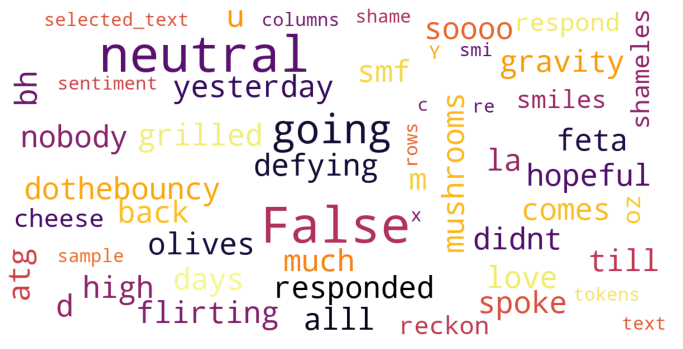

In [15]:
def show_wordcloud(neutral):
    wordcloud = WordCloud(
        background_color='white',
        max_words=200,
        max_font_size=30,
        scale=3,
        colormap= 'inferno',
        random_state=1)
    
    wordcloud=wordcloud.generate(str(neutral))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(neutral)


In [16]:
for item in neutral['tokens']:
    for token in item:
        neutral_tokens.append(token)

### Positive Sentiment

In [17]:
pos_tokens = []
pos = train[train['sentiment']=='positive']

In [18]:
pos.head()

,text,selected_text,sentiment,tokens,sample
6,2am feedings for the baby are fun when he is a...,fun,positive,"[2am, feedings, for, the, baby, are, fun, when...",False
9,journey!? wow... u just became cooler. hehe....,Wow... u just became cooler.,positive,"[journey, wow, u, just, became, cooler, hehe, ...",False
11,i really really like the song love story by ta...,like,positive,"[i, really, really, like, the, song, love, sto...",False
21,playing ghost online is really interesting. th...,interesting.,positive,"[playing, ghost, online, is, really, interesti...",False
25,"the free fillin` app on my ipod is fun, im add...","the free fillin` app on my ipod is fun, im add...",positive,"[the, free, fillin, app, on, my, ipod, is, fun...",False


In [19]:
for item in pos['tokens']:
    for token in item:
        pos_tokens.append(token)

In [20]:
for item in pos['tokens']:
    for token in item:
        pos_tokens.append(token)

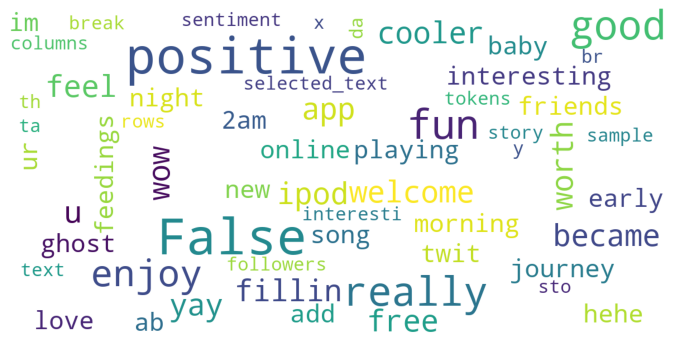

In [21]:
def show_wordcloud(pos):
    wordcloud = WordCloud(
        background_color='white',
        max_words=200,
        max_font_size=30,
        scale=3,
        colormap= 'viridis',
        random_state=1)
    
    wordcloud=wordcloud.generate(str(pos))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(pos)

### Negative Sentiment

In [22]:
neg_tokens = []
neg = train[train['sentiment']=='negative']

In [23]:
neg.head()

,text,selected_text,sentiment,tokens,sample
1,sooo sad i will miss you here in san diego!!!,Sooo SAD,negative,"[sooo, sad, i, will, miss, you, here, in, san,...",False
2,my boss is bullying me...,bullying me,negative,"[my, boss, is, bullying, me]",False
3,what interview! leave me alone,leave me alone,negative,"[what, interview, leave, me, alone]",False
4,"sons of ****, why couldn`t they put them on t...","Sons of ****,",negative,"[sons, of, why, couldn, t, they, put, them, on...",False
12,my sharpie is running dangerously low on ink,DANGERously,negative,"[my, sharpie, is, running, dangerously, low, o...",False


In [24]:
for item in neg['tokens']:
    for token in item:
        neg_tokens.append(token)

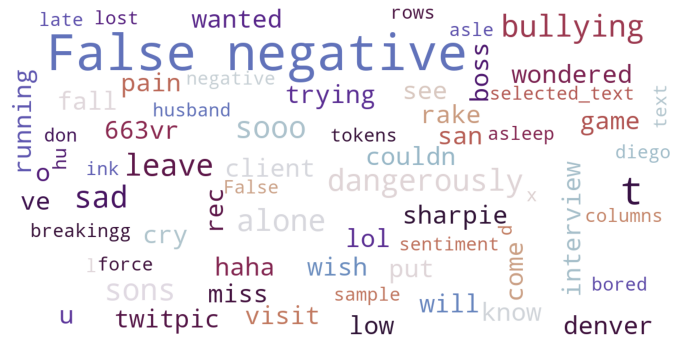

In [25]:
def show_wordcloud(neg):
    wordcloud = WordCloud(
        background_color='white',
        max_words=200,
        max_font_size=30,
        scale=3,
        colormap= 'twilight',
        random_state=1)
    
    wordcloud=wordcloud.generate(str(neg))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(neg)

In [37]:
def patch1(bar,ax):
  for p in bar.patches: 
     width=p.get_width()
     height=p.get_height()
     x,y=p.get_xy() 
     ax.annotate('{}'.format(height),(x+width/2,y+height*1.02),ha='center',fontsize=14)

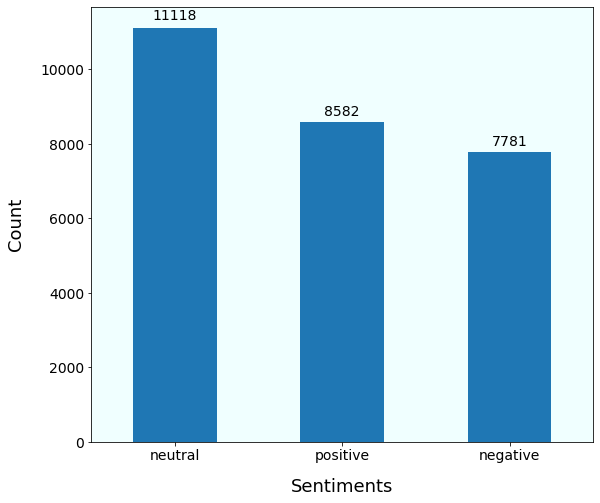

In [38]:
fig,ax=plt.subplots(figsize=(9,8))
a=train['sentiment'].value_counts().plot(kind='bar')
patch1(a,ax) 
ax.set_xlabel("Sentiments",fontsize=18,labelpad=15)
ax.set_ylabel("Count",fontsize=18,labelpad=15)
plt.xticks(rotation='horizontal',fontsize=14)
plt.yticks(fontsize=14)
ax.set_facecolor("azure")
fig.set_facecolor("white")
plt.show()

In [41]:
train['text_length']=train['text'].astype(str).apply(len)
train['text_word_count']= train['text'].apply(lambda x: len(str(x).split()))
train['selected_text_word_count']= train['selected_text'].apply(lambda x: len(str(x).split()))

In [43]:
pos=train[train['sentiment']=='positive']
neg=train[train['sentiment']=='negative']
neutral=train[train['sentiment']=='neutral']

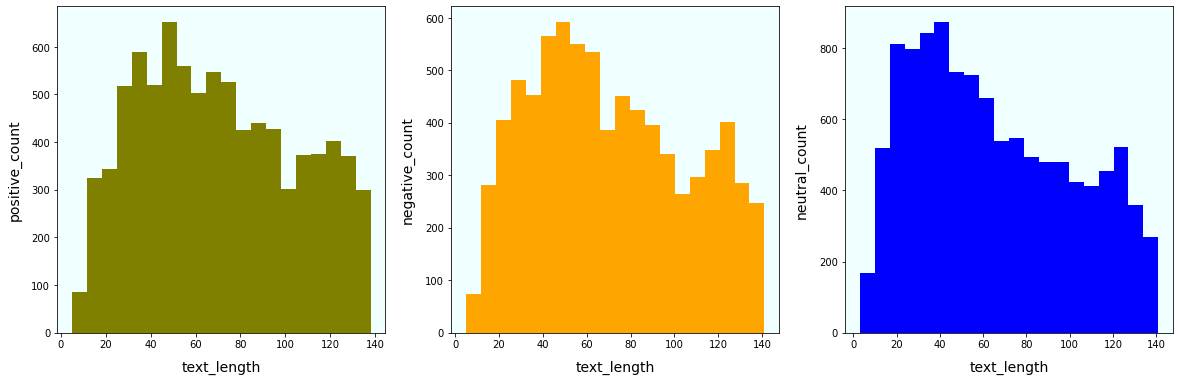

In [58]:
#https://www.geeksforgeeks.org/plotting-histogram-in-python-using-matplotlib/
fig,ax=plt.subplots(1,3,figsize=(20,6))
ax[0].hist(pos['text_length'],bins=20,color='olive')
ax[0].set_facecolor("azure")
ax[0].set_ylabel('positive_count',fontsize=14,labelpad=10)
ax[0].set_xlabel('text_length',fontsize=14,labelpad=10)

ax[1].hist(neg['text_length'],bins=20,color='orange')
ax[1].set_facecolor("azure")
ax[1].set_ylabel('negative_count',fontsize=14,labelpad=10)
ax[1].set_xlabel('text_length',fontsize=14,labelpad=10)

ax[2].hist(neutral['text_length'],bins=20,color='blue')
ax[2].set_facecolor("azure")
ax[2].set_ylabel('neutral_count',fontsize=14,labelpad=10)
ax[2].set_xlabel('text_length',fontsize=14,labelpad=10)

fig.set_facecolor("white")
plt.show()

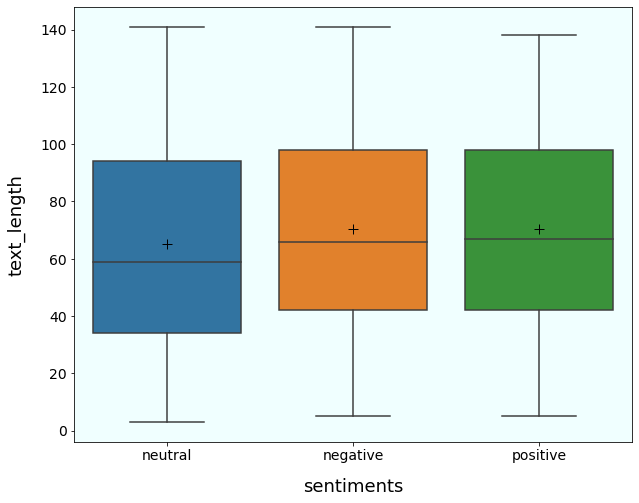

In [50]:
fig,ax=plt.subplots(figsize=(10,8))
#https://www.geeksforgeeks.org/how-to-show-mean-on-boxplot-using-seaborn-in-python/
sns.boxplot(x='sentiment',y='text_length',data=train,showmeans=True,ax=ax,meanprops={"marker": "+","markeredgecolor": "black","markersize": "10"}) 
ax.set_ylabel('text_length',fontsize=18,labelpad=15)
ax.set_xlabel('sentiments',fontsize=18,labelpad=15)
plt.xticks(rotation='horizontal',fontsize=14)
plt.yticks(fontsize=14)
ax.set_facecolor("azure")
fig.set_facecolor("white")
plt.show()

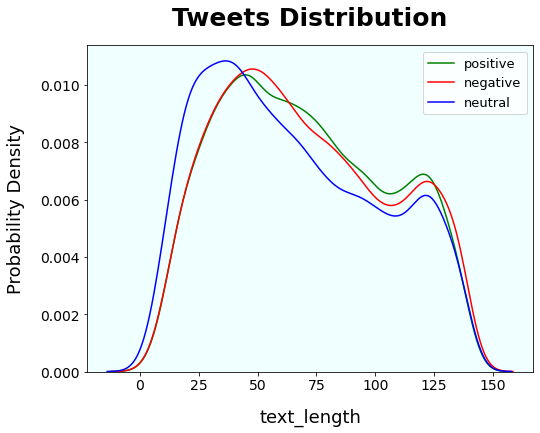

In [61]:
#https://www.geeksforgeeks.org/kde-plot-visualization-with-pandas-and-seaborn/
fig,ax=plt.subplots(figsize=(8,6))
sns.kdeplot(train[train['sentiment']=='positive']['text_length'],color='g',label='positive',ax=ax)
sns.kdeplot(train[train['sentiment']=='negative']['text_length'],color='r',label='negative',ax=ax)
sns.kdeplot(train[train['sentiment']=='neutral']['text_length'],color='b',label='neutral',ax=ax)
ax.set_title('Tweets Distribution',loc='center',fontsize=25,pad='20',fontweight='bold')
ax.set_ylabel('Probability Density',fontsize=18,labelpad=15)
ax.set_xlabel('text_length',fontsize=18,labelpad=15)
plt.xticks(rotation='horizontal',fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=13)
ax.set_facecolor("azure")
fig.set_facecolor("white")
plt.show()

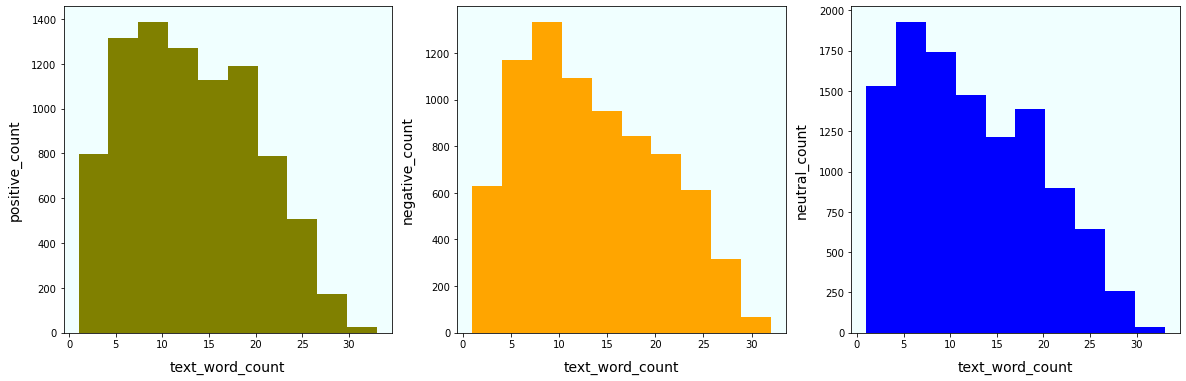

In [64]:
fig,ax=plt.subplots(1,3,figsize=(20,6))
ax[0].hist(pos['text_word_count'],bins=10,color='olive')
ax[0].set_facecolor("azure")
ax[0].set_ylabel('positive_count',fontsize=14,labelpad=10)
ax[0].set_xlabel('text_word_count',fontsize=14,labelpad=10)

ax[1].hist(neg['text_word_count'],bins=10,color='orange')
ax[1].set_facecolor("azure")
ax[1].set_ylabel('negative_count',fontsize=14,labelpad=10)
ax[1].set_xlabel('text_word_count',fontsize=14,labelpad=10)

ax[2].hist(neutral['text_word_count'],bins=10,color='blue')
ax[2].set_facecolor("azure")
ax[2].set_ylabel('neutral_count',fontsize=14,labelpad=10)
ax[2].set_xlabel('text_word_count',fontsize=14,labelpad=10)

fig.set_facecolor("white")
plt.show()

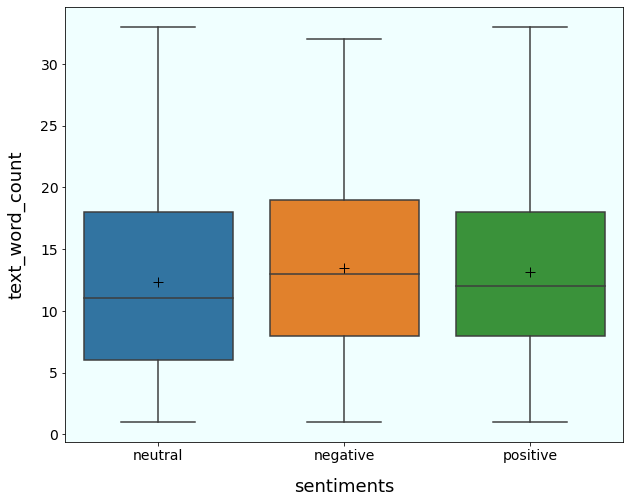

In [66]:
fig,ax=plt.subplots(figsize=(10,8))
#https://www.geeksforgeeks.org/how-to-show-mean-on-boxplot-using-seaborn-in-python/
sns.boxplot(x='sentiment',y='text_word_count',data=train,showmeans=True,ax=ax,meanprops={"marker": "+","markeredgecolor": "black","markersize": "10"}) 
ax.set_ylabel('text_word_count',fontsize=18,labelpad=15)
ax.set_xlabel('sentiments',fontsize=18,labelpad=15)
plt.xticks(rotation='horizontal',fontsize=14)
plt.yticks(fontsize=14)
ax.set_facecolor("azure")
fig.set_facecolor("white")
plt.show()

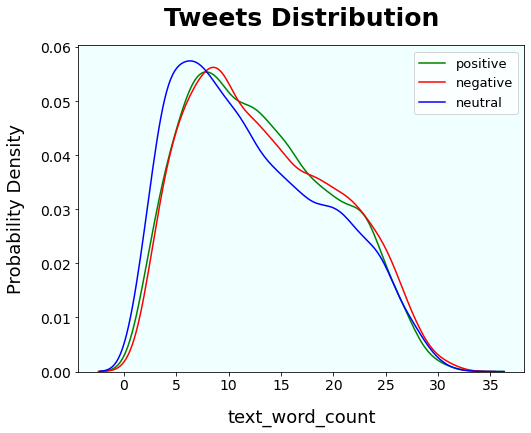

In [62]:
#https://www.geeksforgeeks.org/kde-plot-visualization-with-pandas-and-seaborn/
fig,ax=plt.subplots(figsize=(8,6))
sns.kdeplot(train[train['sentiment']=='positive']['text_word_count'],color='g',label='positive',ax=ax)
sns.kdeplot(train[train['sentiment']=='negative']['text_word_count'],color='r',label='negative',ax=ax)
sns.kdeplot(train[train['sentiment']=='neutral']['text_word_count'],color='b',label='neutral',ax=ax)
ax.set_title('Tweets Distribution',loc='center',fontsize=25,pad='20',fontweight='bold')
ax.set_ylabel('Probability Density',fontsize=18,labelpad=15)
ax.set_xlabel('text_word_count',fontsize=18,labelpad=15)
plt.xticks(rotation='horizontal',fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=13)
ax.set_facecolor("azure")
fig.set_facecolor("white")
plt.show()

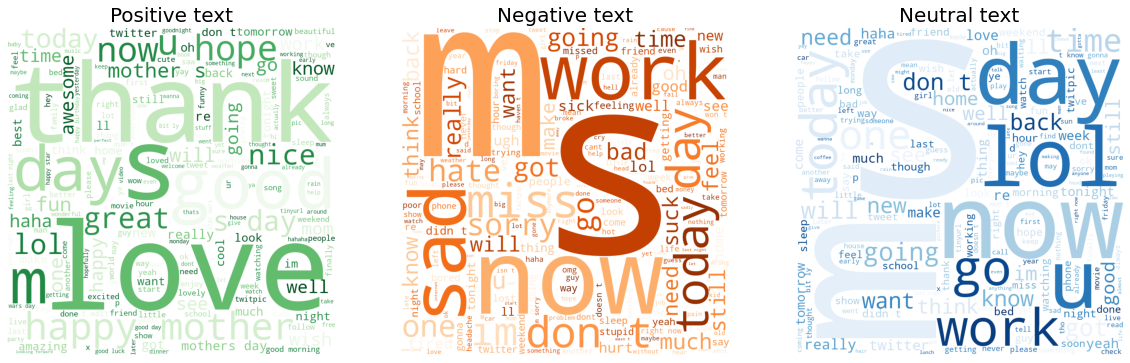

In [73]:
fig,ax=plt.subplots(1,3,figsize=(20,15))
wordcloud1 = WordCloud(width = 800, height = 800,
                background_color ='white',
                colormap='Greens',
                min_font_size = 10).generate(" ".join(train[train['sentiment']=='positive']['text']))
 
ax[0].imshow(wordcloud1)
ax[0].axis("off")
ax[0].set_title('Positive text',fontsize=20)

wordcloud2 = WordCloud(width = 800, height = 800,
                background_color ='white',
                colormap='Oranges',
                min_font_size = 10).generate(" ".join(train[train['sentiment']=='negative']['text']))
 
ax[1].imshow(wordcloud2)
ax[1].axis("off")
ax[1].set_title('Negative text',fontsize=20)

wordcloud3 = WordCloud(width = 800, height = 800,
                background_color ='white',
                colormap='Blues',
                min_font_size = 10).generate(" ".join(train[train['sentiment']=='neutral']['text']))
 
ax[2].imshow(wordcloud3)
ax[2].axis("off")
ax[2].set_title('Neutral text',fontsize=20)

plt.show()

In [77]:
from sklearn.feature_extraction.text import CountVectorizer

In [78]:
def top_n_words(corpus,n):
  vec=CountVectorizer(stop_words='english').fit(corpus)
  bag_of_words=vec.transform(corpus)
  sum_words=bag_of_words.sum(axis=0) 
  words_freq=[(word, sum_words[0,idx]) for word,idx in vec.vocabulary_.items()]
  words_freq=sorted(words_freq,key=lambda x: x[1], reverse=True)
  return(words_freq[:n])

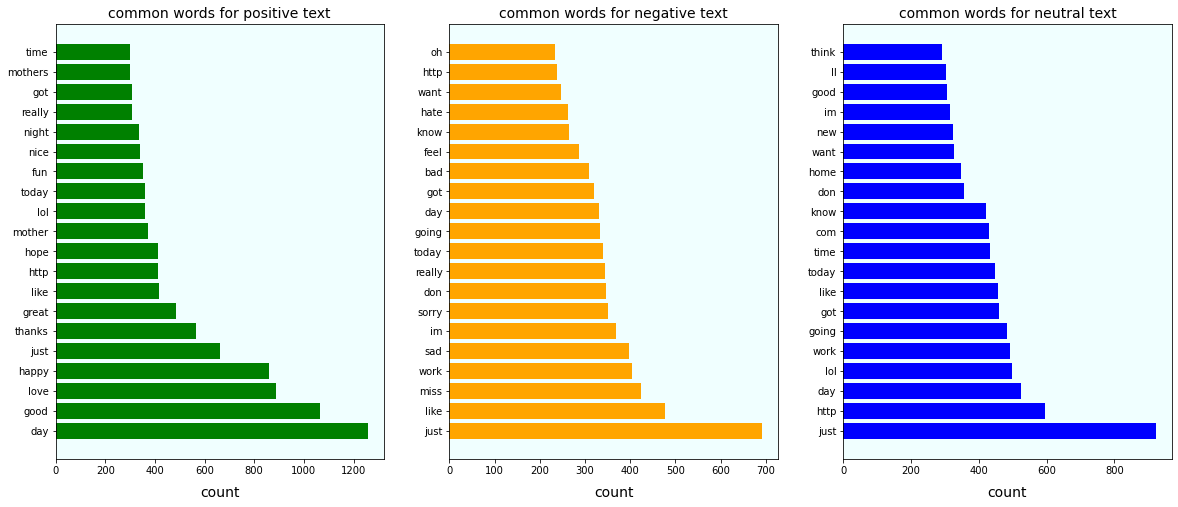

In [82]:
fig,ax=plt.subplots(1,3,figsize=(20,8))
d=top_n_words(pos['text'],20)
x_val=[x[0] for x in d]
y_val=[x[1] for x in d]
ax[0].barh(x_val,y_val,color ='green')
ax[0].set_title('common words for positive text',fontsize=14)
ax[0].set_xlabel('count',fontsize=14,labelpad=10)
ax[0].set_facecolor("azure")

d=top_n_words(neg['text'],20)
x_val=[x[0] for x in d]
y_val=[x[1] for x in d]
ax[1].barh(x_val,y_val,color ='orange')
ax[1].set_title('common words for negative text',fontsize=14)
ax[1].set_xlabel('count',fontsize=14,labelpad=10)
ax[1].set_facecolor("azure")

d=top_n_words(neutral['text'],20)
x_val=[x[0] for x in d]
y_val=[x[1] for x in d]
ax[2].barh(x_val,y_val,color ='blue')
ax[2].set_title('common words for neutral text',fontsize=14)
ax[2].set_xlabel('count',fontsize=14,labelpad=10)
ax[2].set_facecolor("azure")

fig.set_facecolor("white")
plt.show()

ValueError: np.nan is an invalid document, expected byte or unicode string.

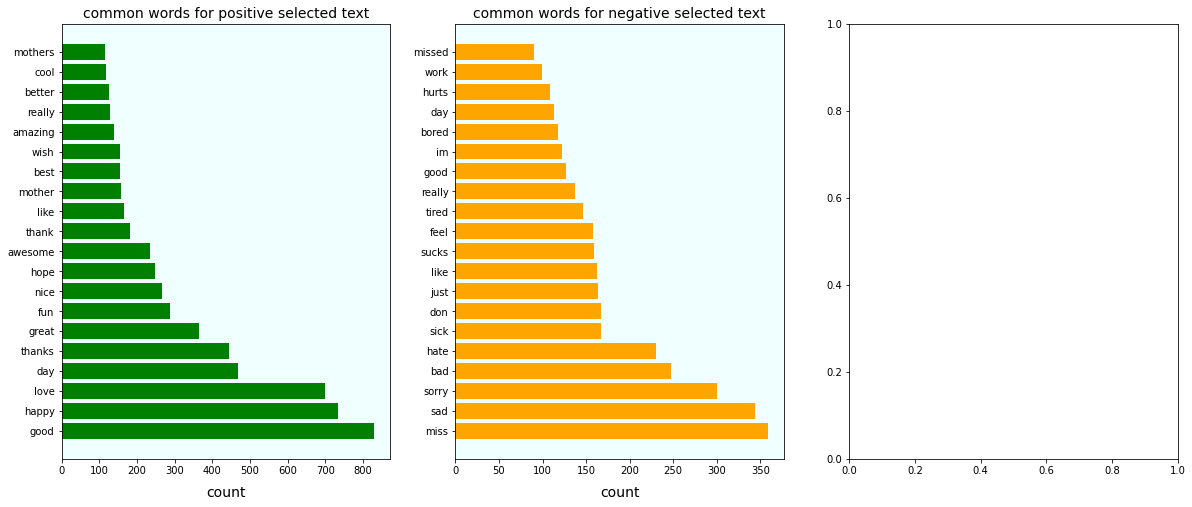

In [83]:
fig,ax=plt.subplots(1,3,figsize=(20,8))
d=top_n_words(pos['selected_text'],20)
x_val=[x[0] for x in d]
y_val=[x[1] for x in d]
ax[0].barh(x_val,y_val,color ='green')
ax[0].set_title('common words for positive selected text',fontsize=14)
ax[0].set_xlabel('count',fontsize=14,labelpad=10)
ax[0].set_facecolor("azure")

d=top_n_words(neg['selected_text'],20)
x_val=[x[0] for x in d]
y_val=[x[1] for x in d]
ax[1].barh(x_val,y_val,color ='orange')
ax[1].set_title('common words for negative selected text',fontsize=14)
ax[1].set_xlabel('count',fontsize=14,labelpad=10)
ax[1].set_facecolor("azure")

d=top_n_words(neutral['selected_text'],20)
x_val=[x[0] for x in d]
y_val=[x[1] for x in d]
ax[2].barh(x_val,y_val,color ='blue')
ax[2].set_title('common words for neutral selected text',fontsize=14)
ax[2].set_xlabel('count',fontsize=14,labelpad=10)
ax[2].set_facecolor("azure")

fig.set_facecolor("white")
plt.show()